In [110]:
# # https://www.properati.com.ar/data
# ! wget -O ar_properties.csv.gz -q https://storage.googleapis.com/properati-data-public/ar_properties.csv.gz
# ! gzip -d -f /content/ar_properties.csv.gz

In [111]:
import pandas as pd
import numpy as np

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns


from pprint import pprint

# Lectura de datos

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
# ! gzip -d -f /content/drive/MyDrive/ar_properties.csv.gz

In [114]:
# df = pd.read_csv('/content/drive/MyDrive/ar_properties.csv', index_col="id")  
df = pd.read_csv('/content/drive/MyDrive/inmoblimpio.csv', index_col="id")

In [115]:
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
hjHZd/BZqSBy3zb+RrqPYg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.638910,-58.476073,Argentina,Capital Federal,Floresta,NaN,...,NaN,372.0,NaN,450000.0,USD,Mensual,Exclente lote !!,"Lote 365 mts 8,90 x 43 mts C3 II.. FOT 3.6 PAR...",Lote,Venta
2KF4gGpEVoyqnMVFBcF7IA==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.562124,-58.464449,Argentina,Capital Federal,Belgrano,NaN,...,NaN,NaN,NaN,20000.0,USD,Mensual,Excelente cochera fija y cubierta en edificio ...,"Muy buena cochera, en el 4to piso en excelente...",Cochera,Venta
BRbo9ohkAnogBN3vgcbh1Q==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.598112,-58.400784,Argentina,Capital Federal,Recoleta,NaN,...,3.0,265.0,265.0,600000.0,USD,Mensual,Oficina comercial · 265m² · 2 Cochera,Gran Oportunidad! Unica piso de oficinas de 26...,Oficina,Venta
twX40kvJoG1MI6LVXnRKpA==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.614123,-58.378985,Argentina,Capital Federal,Monserrat,NaN,...,3.0,150.0,150.0,195000.0,USD,Mensual,Importante Oficina en Micro centro de 150 m2.,Importante Oficina de de 150 m2 con palier pr...,Oficina,Venta
+KGGxikZuWylLGEfAS1QQQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.603233,-58.385218,Argentina,Capital Federal,San Nicolás,NaN,...,1.0,NaN,12.0,22000.0,USD,Mensual,Oficina - San Nicolas,VENTA DE OFICINA A METROS DEL PALACIO DE TRIBU...,Oficina,Venta


<h1> Análisis del conjunto de datos
 <h2> Parte 1 PreProcesamiento.

In [116]:
df.shape

(175149, 24)

In [117]:
df.columns

Index(['ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1',
       'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175149 entries, hjHZd/BZqSBy3zb+RrqPYg== to fJLVUIziPl31ACoaE/fj1g==
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ad_type          175149 non-null  object 
 1   start_date       175149 non-null  object 
 2   end_date         175149 non-null  object 
 3   created_on       175149 non-null  object 
 4   lat              165257 non-null  float64
 5   lon              165257 non-null  float64
 6   l1               175149 non-null  object 
 7   l2               175149 non-null  object 
 8   l3               175149 non-null  object 
 9   l4               8615 non-null    object 
 10  l5               0 non-null       float64
 11  l6               0 non-null       float64
 12  rooms            148869 non-null  float64
 13  bedrooms         128525 non-null  float64
 14  bathrooms        153305 non-null  float64
 15  surface_total    117880 non-null  float64
 16  su

Primeras concluciones:

---


 

*   l6 no tiene informacion, se dropea.
*   hay un 10% del database sin lat y long puede evaluarse tirar las filas sin esa info.
*   **Mas importante hay una parte del databse sin precio, eso se tira seguro.**

---
A nivel operativo las fechas hay que pasarlas a formato de fecha. <br />









En mis datos a predecir solo hay USD asique para evitar problemas de cambio de unidades voy a eleminar las que no son en USD.
Tambien es solo de argentina a predecir. <br />
EL objetivo es solo precios por lo que operaciones que no sean de comrpa tambien se van.<br />
Mis datos son solo de Capital Federal asique voy a filtrar tambien por eso.<br />
Estoy buscando precios de abril del 2022 asique en principio podria ver que precios estan viejos. Mi base de datos es de mayo 2021 asique tendre que hacer ajustes con numeros conocidos de evolución de precios.
<br />
Por ultimo, hay busco datos de barrios especificos asique lo que este por fuera solo añade ruido.

In [119]:
df.currency.value_counts()

USD    175149
Name: currency, dtype: int64

In [120]:
df=df[df.currency=='USD']

In [121]:
df=df[df.l1=='Argentina']

In [122]:
df=df[df.l2=='Capital Federal']

Estos son los barrios que vienen del set de los que quiero predecir.

In [123]:
a=['Balvanera', 'Villa Urquiza', 'Palermo', 'Belgrano', 'Floresta',
       'Villa Pueyrredon', 'Saavedra', 'Villa Devoto', 'San Nicolás',
       'Chacarita', 'Villa Crespo', 'Boedo', 'Flores', 'Paternal', 'Boca',
       'Recoleta', 'Caballito', 'Nuñez', 'Constitución', 'Colegiales',
       'San Telmo', 'Monserrat', 'Puerto Madero', 'Villa del Parque',
       'Almagro', 'Villa Ortuzar', 'Villa Lugano', 'San Cristobal',
       'Barracas', 'Liniers', '2 Ambientes', 'Mataderos',
       'Villa Santa Rita', 'Parque Patricios', 'Parque Chas',
       'Villa General Mitre', 'Retiro', 'Parque Avellaneda',
       'Monte Castro', 'Parque Chacabuco', 'Villa Luro', 'Versalles',
       'Coghlan', 'Vélez Sarsfield', 'Nueva Pompeya', 'Agronomía',
       'Villa Real', 'GBA Norte']

In [124]:
df = df[df['l3'].isin(a)]

In [125]:
# df.to_csv("inmoblimpio.csv")

In [126]:
df['start_date']=pd.to_datetime(df['start_date'])

In [127]:
df['start_date'].max()

Timestamp('2021-06-17 00:00:00')

In [128]:
df['start_date'].min()

Timestamp('2020-05-24 00:00:00')

In [129]:
df['end_date'].replace('9999-12-31','2020-12-31', inplace=True)

In [130]:
df['end_date']=pd.to_datetime(df['end_date'])
df['end_date'].max()

Timestamp('2021-08-16 00:00:00')

In [131]:
df=df[df.start_date>'2021-01-01']

Hago un ajuste preliminar de la columna precios.

In [132]:
df.l3.unique()

array(['Recoleta', 'Monserrat', 'Balvanera', 'Almagro', 'Palermo',
       'San Telmo', 'San Nicolás', 'Villa Crespo', 'Flores', 'Caballito',
       'Retiro', 'Floresta', 'Monte Castro', 'Villa General Mitre',
       'Villa Urquiza', 'Parque Chacabuco', 'Belgrano', 'Barracas',
       'Boedo', 'Nuñez', 'Puerto Madero', 'Coghlan', 'Parque Chas',
       'San Cristobal', 'Villa Santa Rita', 'Villa Lugano', 'Saavedra',
       'Colegiales', 'Villa Devoto', 'Liniers', 'Boca',
       'Parque Avellaneda', 'Mataderos', 'Versalles', 'Villa Real',
       'Parque Patricios', 'Villa Ortuzar', 'Villa Luro',
       'Villa del Parque', 'Chacarita', 'Constitución', 'Paternal',
       'Agronomía'], dtype=object)

In [133]:
df.loc[df.l3 == 'Palermo', ['price']]=df.price*0.9
df.loc[df.l3 ==  'Belgrano',['price']]=df.price*0.95
df.loc[df.l3 == 'Recoleta', ['price']]=df.price*0.87
df.loc[df.l3 ==  'Caballito',['price']]=df.price*0.93
df.loc[df.l3 == 'Villa Urquiza', ['price']]=df.price*0.9
df.loc[df.l3 ==  'Almagro',['price']]=df.price*0.922
df.loc[df.l3 == 'Villa Crespo', ['price']]=df.price*0.824
df.loc[df.l3 ==  'Nuñez',['price']]=df.price*0.946

df.loc[df.l3 == 'Flores', ['price']]=df.price*0.94
df.loc[df.l3 ==  'Balvanera',['price']]=df.price*0.95
df.loc[df.l3 == 'Puerto Madero', ['price']]=df.price*0.96
df.loc[df.l3 ==  'Colegiales',['price']]=df.price*0.91
df.loc[df.l3 == 'Saavedra', ['price']]=df.price*0.9
df.loc[df.l3 ==  'Villa Devoto',['price']]=df.price*0.922
df.loc[df.l3 == 'Floresta', ['price']]=df.price*0.904
df.loc[df.l3 ==  'Villa Del Parque',['price']]=df.price*0.894

df.loc[df.l3 == 'Retiro', ['price']]=df.price*0.881
df.loc[df.l3 ==  'Barracas',['price']]=df.price*1.08
df.loc[df.l3 == 'San Cristobal', ['price']]=df.price*0.811
df.loc[df.l3 ==  'San Telmo',['price']]=df.price*0.971
df.loc[df.l3 == 'Boedo', ['price']]=df.price*0.898
df.loc[df.l3 ==  'San Nicolas',['price']]=df.price*0.923
df.loc[df.l3 == 'Mataderos', ['price']]=df.price*0.806
df.loc[df.l3 ==  'Liniers',['price']]=df.price*0.854

df.loc[df.l3 == 'Parque Chacabuco', ['price']]=df.price*0.885
df.loc[df.l3 ==  'Coghlan',['price']]=df.price*1.015
df.loc[df.l3 == 'Monserrat', ['price']]=df.price*0.951
df.loc[df.l3 ==  'Villa Luro',['price']]=df.price*0.867
df.loc[df.l3 == 'Parque Patricios', ['price']]=df.price*0.982
df.loc[df.l3 ==  'Chacarita',['price']]=df.price*0.845
df.loc[df.l3 == 'Villa Ortuzar', ['price']]=df.price*0.89
df.loc[df.l3 ==  'Monte Castro',['price']]=df.price*0.959

df.loc[df.l3 == 'Constitucion', ['price']]=df.price*0.851
df.loc[df.l3 ==  'Paternal',['price']]=df.price*0.907
df.loc[df.l3 == 'Villa General Mitre', ['price']]=df.price*1.088
df.loc[df.l3 ==  'Boca',['price']]=df.price*0.98
df.loc[df.l3 == 'Parque Avellaneda', ['price']]=df.price*0.862
df.loc[df.l3 ==  'Villa Santa Rita',['price']]=df.price*1.04
df.loc[df.l3 == 'Parque Chas', ['price']]=df.price*0.989
df.loc[df.l3 ==  'Versalles',['price']]=df.price*0.936


df.loc[df.l3 == 'Agronomia', ['price']]=df.price*0.815
df.loc[df.l3 ==  'Villa Real',['price']]=df.price*0.851





In [134]:
df.currency.value_counts()

USD    71384
Name: currency, dtype: int64

In [135]:
df=df.drop('l6', axis=1)

In [136]:
df['price_period'].value_counts()

Mensual    42815
Name: price_period, dtype: int64

In [137]:
df.ad_type.value_counts()

Propiedad    71384
Name: ad_type, dtype: int64

Puedo tirar tambien el price period y ad type.

In [138]:
df.dropna(subset=['price','lat','lon','l3','title','description','operation_type'], inplace=True)

In [139]:
df=df.drop('price_period', axis=1)

In [140]:
df=df.drop('ad_type', axis=1)

In [141]:
df.operation_type.unique()

array(['Alquiler', 'Venta', 'Alquiler temporal'], dtype=object)

In [142]:
df=df[df.operation_type=='Venta']

In [143]:
df.shape

(64282, 21)

<h1>Interludio para df_pred

<h1> Análisis del conjunto de datos
 <h2> Parte 2 Analisis de datos y creación de features.
 Aca empiezo a hacer cambios en los datos, podria ya sumar lo que voy a predecir asi los concateno y despues los separo.

Modifiquemos lat y lon

In [144]:


df['rot_45_x'] = (0.707 * df['lat']) + (0.707 * df['lon'])
df['rot_45_y'] = (0.707 * df['lon']) + (0.707 * df['lat'])
df['rot_30_x'] = (0.866 * df['lat']) + (0.5 * df['lon'])
df['rot_30_y'] = (0.866 * df['lon']) + (0.5 * df['lat'])




In [145]:
df['start_date']=pd.to_datetime(df['start_date'])
df['anio_s']=pd.DatetimeIndex(df['start_date']).year
df['mes_s']=pd.DatetimeIndex(df['start_date']).month
df['end_date']=pd.to_datetime(df['end_date'])
df['anio_e']=pd.DatetimeIndex(df['end_date']).year
df['mes_e']=pd.DatetimeIndex(df['end_date']).month
df['created_on']=pd.to_datetime(df['created_on'])
df['anio_c']=pd.DatetimeIndex(df['created_on']).year
df['mes_c']=pd.DatetimeIndex(df['created_on']).month

In [146]:
# np.log(df.rooms).plot.hist()

In [147]:
df['logr']=np.log(df.rooms+1)

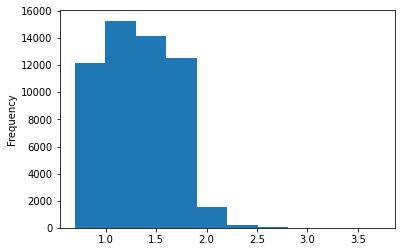

In [148]:
df.logr.plot.hist()

In [149]:
df.bedrooms.value_counts()

 1.0      18031
 2.0      14669
 3.0      10067
 0.0       3198
 4.0       3009
 5.0        542
 6.0        196
 7.0         46
 8.0         36
 10.0        16
 9.0         15
 12.0        14
 15.0         8
 27.0         5
 16.0         4
 20.0         4
 14.0         4
 13.0         4
 30.0         3
 24.0         3
 11.0         3
 22.0         2
 32.0         2
 39.0         2
 101.0        2
 18.0         2
 17.0         2
 33.0         1
 82.0         1
 40.0         1
 43.0         1
 36.0         1
-2.0          1
 23.0         1
 64.0         1
 34.0         1
 25.0         1
 37.0         1
 50.0         1
-1.0          1
Name: bedrooms, dtype: int64

In [150]:
# df.bedrooms = np.where(df.bedrooms < 1, 0.1, df.bedrooms)
df=df[df.bedrooms>0]

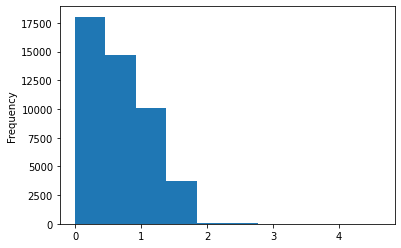

In [151]:
np.log(df.bedrooms).plot.hist()

In [152]:
df['logbed']=np.log(df.bedrooms+1)

In [153]:
# np.log(df.bathrooms).plot.hist()

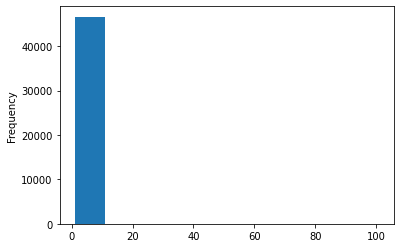

In [154]:
df.bedrooms.plot.hist()

In [155]:
df['logbath']=np.log(df.bathrooms+1)

In [156]:
df.shape

(46702, 34)

In [157]:
df.surface_covered.max()

123000.0

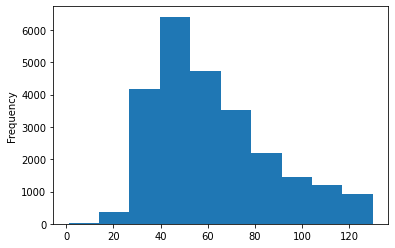

In [158]:
df.surface_covered[df.surface_covered.between(df.surface_covered.quantile(.0), df.surface_covered.quantile(.85))].plot.hist()

Limpio algunos outliers de superficie cubierta.

In [159]:
df.surface_covered.value_counts();

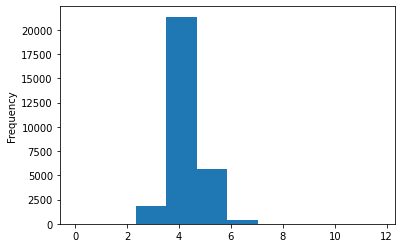

In [160]:
np.log(df.surface_covered).plot.hist()

In [161]:
df['logsupcov']=np.log(df.surface_covered+1)

In [162]:
df.shape

(46702, 35)

In [163]:
# df=df[df.surface_covered<df.surface_covered.quantile(.9999)]
# df.surface_covered.plot.hist()

# df.shape (405996, 24) de original (834056, 24)


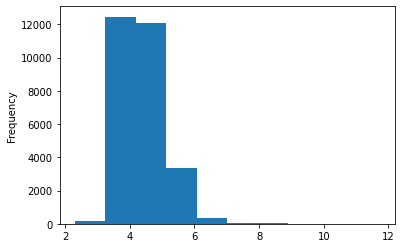

In [164]:
np.log(df.surface_total).plot.hist()

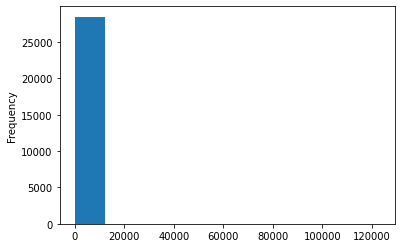

In [165]:
df.surface_total.plot.hist()

In [166]:
df['logsuptot']=np.log(df.surface_total+1)

In [167]:
df.l2.unique()

array(['Capital Federal'], dtype=object)

In [168]:
df.l1.unique()

array(['Argentina'], dtype=object)

In [169]:
df.l3.value_counts()

Belgrano               8330
Palermo                6606
Caballito              3278
Recoleta               2927
Villa Urquiza          2715
Almagro                1802
Villa Crespo           1592
Flores                 1458
Nuñez                  1437
Balvanera              1320
Colegiales             1133
Saavedra                911
Villa Devoto            899
Floresta                800
Villa del Parque        789
Barracas                731
Puerto Madero           719
San Cristobal           676
Retiro                  648
Boedo                   625
San Telmo               606
San Nicolás             596
Mataderos               535
Liniers                 491
Parque Chacabuco        438
Coghlan                 429
Monserrat               426
Villa Luro              403
Villa Lugano            354
Parque Patricios        338
Chacarita               304
Villa Ortuzar           293
Monte Castro            260
Constitución            255
Paternal                240
Villa General Mitre 

In [170]:
df.property_type.unique()

array(['Departamento', 'Oficina', 'PH', 'Casa', 'Otro', 'Lote',
       'Local comercial', 'Cochera', 'Depósito', 'Casa de campo'],
      dtype=object)

In [171]:
df["Nuevo"] = df["description"].str.lower().str.contains("excel")

df["1am"] = df["description"].str.lower().str.contains("1 ambiente")
df["2am"] = df["description"].str.lower().str.contains("2 ambiente")
df["3am"] = df["description"].str.lower().str.contains("3 ambiente")
df["4am"] = df["description"].str.lower().str.contains("4 ambiente")

df["Patio"] = df["description"].str.lower().str.contains("patio")
df["Balcon"] = df["description"].str.lower().str.contains("balcon")
df["Pileta"] = df["description"].str.lower().str.contains("pileta")
df["Reciclado"] = df["description"].str.lower().str.contains("reciclado")

df["cocina"] = df["description"].str.lower().str.contains("cocina")
df["escri"] = df["description"].str.lower().str.contains("escritorio")
df["apto"] = df["description"].str.lower().str.contains("apto profesional")
df["laundry"] = df["description"].str.lower().str.contains("laundry")
df["parri"] = df["description"].str.lower().str.contains("parrilla")

In [172]:
df.Nuevo.value_counts()

True     23373
False    23329
Name: Nuevo, dtype: int64

In [173]:
df['1am'].value_counts()

False    46061
True       641
Name: 1am, dtype: int64

In [174]:
df['2am'].value_counts()

False    35950
True     10752
Name: 2am, dtype: int64

In [175]:
df['3am'].value_counts()

False    35909
True     10793
Name: 3am, dtype: int64

In [176]:
df['4am'].value_counts()

False    40042
True      6660
Name: 4am, dtype: int64

In [177]:
df['Patio'].value_counts()

False    38179
True      8523
Name: Patio, dtype: int64

In [178]:
df['Balcon'].value_counts()

False    35133
True     11569
Name: Balcon, dtype: int64

In [179]:
df['Pileta'].value_counts()

False    41826
True      4876
Name: Pileta, dtype: int64

In [180]:
df['Reciclado'].value_counts()

False    41660
True      5042
Name: Reciclado, dtype: int64

Algunas cuentitas:

In [181]:
df["parri"] = df["description"].str.lower().str.contains("parrilla")

In [182]:
df['parri'].value_counts()

False    34339
True     12363
Name: parri, dtype: int64

In [183]:
df['r/sup']=df['rooms']/df['surface_covered']

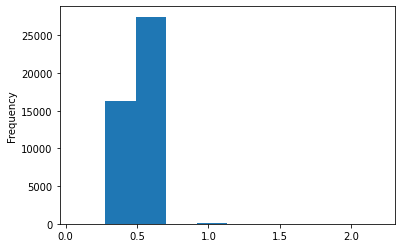

In [184]:
np.log((df.bedrooms/df.rooms)+1).plot.hist()

# Tratamiento de los datos

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46702 entries, MZ5qRJ730rzfdiow7rT9Pg== to YlLn73RCQP4pM51jaWJtNg==
Data columns (total 51 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start_date       46702 non-null  datetime64[ns]
 1   end_date         46702 non-null  datetime64[ns]
 2   created_on       46702 non-null  datetime64[ns]
 3   lat              46702 non-null  float64       
 4   lon              46702 non-null  float64       
 5   l1               46702 non-null  object        
 6   l2               46702 non-null  object        
 7   l3               46702 non-null  object        
 8   l4               1520 non-null   object        
 9   l5               0 non-null      float64       
 10  rooms            43971 non-null  float64       
 11  bedrooms         46702 non-null  float64       
 12  bathrooms        45542 non-null  float64       
 13  surface_total    28481 non-null  float64       
 14  s

In [186]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'l4', 'l5', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'currency', 'title', 'description',
       'property_type', 'operation_type', 'rot_45_x', 'rot_45_y', 'rot_30_x',
       'rot_30_y', 'anio_s', 'mes_s', 'anio_e', 'mes_e', 'anio_c', 'mes_c',
       'logr', 'logbed', 'logbath', 'logsupcov', 'logsuptot', 'Nuevo', '1am',
       '2am', '3am', '4am', 'Patio', 'Balcon', 'Pileta', 'Reciclado', 'cocina',
       'escri', 'apto', 'laundry', 'parri', 'r/sup'],
      dtype='object')

# Modelización

In [195]:
from sklearn.model_selection import train_test_split
# Separate target from predictors
numerical_cols=['rooms', 'bedrooms', 'bathrooms','r/sup']
numerical_cols2=['logsuptot', 'logsupcov']
numerical_cols3=['rot_45_x', 'rot_45_y', 'rot_30_x',
       'rot_30_y']
categorical_cols=['l3','property_type',"Nuevo",'1am','2am','3am','4am', 'Patio', 'Balcon', 'Pileta', 'Reciclado','cocina',
       'escri', 'apto', 'laundry', 'parri']
my_cols = categorical_cols + numerical_cols + numerical_cols2 + numerical_cols3
y = df.price
X = df[my_cols]
# X = df.drop(['price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=42)


                                                                

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [196]:
def log_transform(x):
    return np.log(x + 1)

In [197]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler


# Preprocessing for numerical data
scaler = StandardScaler()
scaler2 = RobustScaler()
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.



transformer = FunctionTransformer(log_transform)
numerical_transformer = Pipeline(steps=[('numimputer', SimpleImputer(strategy='mean')),
                                        ('scaler', scaler)])
# Preprocessing for numerical data 2
numerical_transformer2 = Pipeline(steps=[('numimputer2', SimpleImputer(strategy='mean'))]
                                        )

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
         ('num2', numerical_transformer2, numerical_cols2),
        #  ('num3', numerical_transformer3, numerical_cols3),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [198]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200,max_depth=10, random_state=42, n_jobs=-1)


In [199]:
df.shape

(46702, 51)

In [200]:
from sklearn.metrics import mean_absolute_error
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# # Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# # Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = sk.model_selection.cross_val_score(my_pipeline, X_train, y=y_train, cv=4, scoring='neg_root_mean_squared_error',error_score='raise')
# score = mean_absolute_error(y_valid, preds)

print('Score:', score)

Score: [-200786.58990335 -229841.93465556 -246763.38310907 -260541.98976807]


In [201]:
score2 = mean_absolute_error(y_valid, preds)
print('Score2:', score2)

Score2: 58179.50828445467


In [202]:
import math
math.sqrt(score2)

241.2042874503989

In [203]:
corr_matrix = df.corr()

In [204]:
corr_matrix['price'].sort_values(ascending=False)

price              1.000000
logsupcov          0.621402
logsuptot          0.590472
bathrooms          0.536886
logbath            0.514712
rooms              0.452674
logr               0.445227
logbed             0.414577
bedrooms           0.346164
escri              0.231279
rot_30_x           0.206481
rot_45_x           0.200426
rot_45_y           0.200426
rot_30_y           0.180638
lat                0.149395
Pileta             0.131677
surface_total      0.130312
lon                0.123500
surface_covered    0.112246
4am                0.076955
parri              0.063927
Reciclado          0.047217
Nuevo              0.032124
Balcon             0.030523
anio_e             0.023482
laundry            0.023139
cocina             0.016559
mes_c             -0.011550
mes_s             -0.011550
mes_e             -0.022696
Patio             -0.028844
1am               -0.042986
r/sup             -0.074042
apto              -0.089988
3am               -0.091000
2am               -0

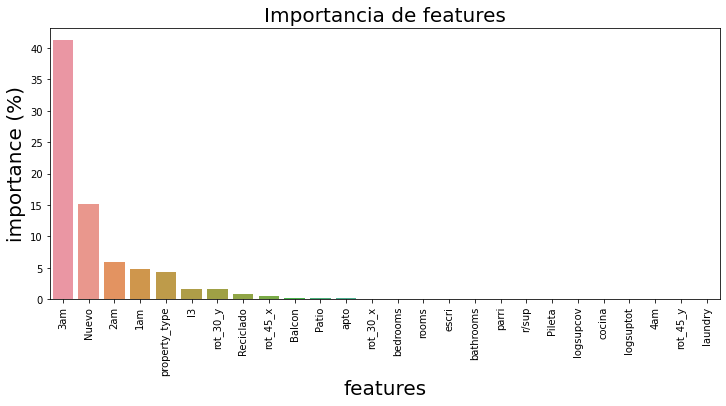

In [205]:
# columnas_2=df.columns.drop('price')
columnas_2=X.columns
columnas_2
diccionario = pd.DataFrame(list(zip(columnas_2,my_pipeline.steps[1][1].feature_importances_*100)), columns = ['features','importance (%)']);
primeros = diccionario.nlargest(40,columns=['importance (%)']);

plt.figure(figsize=(12,5))
sns.barplot(x = "features", y = "importance (%)",data = primeros)
plt.xticks(rotation = 90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Importancia de features', fontsize=20)
plt.xlabel('features', fontsize=20)
plt.ylabel('importance (%)', fontsize=20)
plt.show()

## Predicción para Kaggle


In [206]:
df_pred = pd.read_csv('/content/drive/MyDrive/a_predecir.csv', index_col="id")
df_pred.fillna(0, inplace=True)

In [213]:

df_pred['rot_45_x'] = (0.707 * df_pred['lat']) + (0.707 * df_pred['lon'])
df_pred['rot_45_y'] = (0.707 * df_pred['lon']) + (0.707 * df_pred['lat'])
df_pred['rot_30_x'] = (0.866 * df_pred['lat']) + (0.5 * df_pred['lon'])
df_pred['rot_30_y'] = (0.866 * df_pred['lon']) + (0.5 * df_pred['lat'])



df_pred['start_date']=pd.to_datetime(df_pred['start_date'])
df_pred['anio_s']=pd.DatetimeIndex(df_pred['start_date']).year
df_pred['mes_s']=pd.DatetimeIndex(df_pred['start_date']).month
df_pred['end_date']=pd.to_datetime(df_pred['end_date'])
df_pred['anio_e']=pd.DatetimeIndex(df_pred['end_date']).year
df_pred['mes_e']=pd.DatetimeIndex(df_pred['end_date']).month
df_pred['created_on']=pd.to_datetime(df_pred['created_on'])
df_pred['anio_c']=pd.DatetimeIndex(df_pred['created_on']).year
df_pred['mes_c']=pd.DatetimeIndex(df_pred['created_on']).month


#Estos +1 son por si aparecen 0
df_pred['logr']=np.log(df_pred.rooms+1)
df_pred['logbed']=np.log(df_pred.bedrooms+1)
df_pred['logbath']=np.log(df_pred.bathrooms+1)
df_pred['logsupcov']=np.log(df_pred.surface_covered+1)
df_pred['logsuptot']=np.log(df_pred.surface_total+1)


df_pred["Nuevo"] = df_pred["description"].str.lower().str.contains("excel")
df_pred["1am"] = df_pred["description"].str.lower().str.contains("1 ambiente")
df_pred["2am"] = df_pred["description"].str.lower().str.contains("2 ambiente")
df_pred["3am"] = df_pred["description"].str.lower().str.contains("3 ambiente")
df_pred["4am"] = df_pred["description"].str.lower().str.contains("4 ambiente")
df_pred["Patio"] = df_pred["description"].str.lower().str.contains("patio")
df_pred["Balcon"] = df_pred["description"].str.lower().str.contains("balcon")
df_pred["Pileta"] = df_pred["description"].str.lower().str.contains("pileta")
df_pred["Reciclado"] = df_pred["description"].str.lower().str.contains("reciclado")
df_pred["cocina"] = df_pred["description"].str.lower().str.contains("cocina")
df_pred["escri"] = df_pred["description"].str.lower().str.contains("escritorio")
df_pred["apto"] = df_pred["description"].str.lower().str.contains("apto profesional")
df_pred["laundry"] = df_pred["description"].str.lower().str.contains("laundry")
df_pred["parri"] = df_pred["description"].str.lower().str.contains("parrilla")

df_pred['r/sup']=df_pred['rooms']/df_pred['surface_covered']

In [215]:
df_pred.l3.unique()

array(['Balvanera', 'Villa Urquiza', 'Palermo', 'Belgrano', 'Floresta',
       'Villa Pueyrredon', 'Saavedra', 'Villa Devoto', 'San Nicolás',
       'Chacarita', 'Villa Crespo', 'Boedo', 'Flores', 'Paternal', 'Boca',
       'Recoleta', 'Caballito', 'Nuñez', 'Constitución', 'Colegiales',
       'San Telmo', 'Monserrat', 'Puerto Madero', 'Villa del Parque',
       'Almagro', 'Villa Ortuzar', 'Villa Lugano', 'San Cristobal',
       'Barracas', 'Liniers', '2 Ambientes', 'Mataderos',
       'Villa Santa Rita', 'Parque Patricios', 'Parque Chas',
       'Villa General Mitre', 'Retiro', 'Parque Avellaneda',
       'Monte Castro', 'Parque Chacabuco', 'Villa Luro', 'Versalles',
       'Coghlan', 'Vélez Sarsfield', 'Nueva Pompeya', 'Agronomía',
       'Villa Real', 'GBA Norte'], dtype=object)

In [216]:
# quedate con las mismas columnas que ar_properties
X_pred = df_pred[X.columns]

In [217]:
from sklearn import set_config
set_config(display='diagram')
my_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['rooms', 'bedrooms',
                                                   'bathrooms', 'r/sup']),
                                                 ('num2',
                                                  Pipeline(steps=[('numimputer2',
                                                                   SimpleImputer())]),
                                                  ['logsuptot', 'logsupcov']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['l3', 'property_type',
                                                   'Nuevo', '1am', '2am', '3am',
                                                   '4am', 'Patio', 'Balcon',
                                                   'Pileta', 'Reciclado',
                                                   'cocina', 'escri', 'apto',
                                                   'laundry', 'parri'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, n_estimators=200,
                                       n_jobs=-1, random_state=42))])

In [218]:
# los mejores hiperparámetros encontrados antes
n_estimators = 200
max_depth = 10

# entrenamiento
# reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs=-1)
my_pipeline.fit(X, y)

# predicción
df_pred["price"] = my_pipeline.predict(X_pred)

In [219]:
# grabo la solución
df_pred[["price"]].to_csv("solucion.csv")